## Import Libraries

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from pathlib import Path

from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import LabelEncoder,OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

## Load Data

In [3]:
from pathlib import Path


In [4]:

csv_path = Path("Titanic-Dataset.csv")
test_path= Path("test.csv")
df= pd.read_csv(csv_path)
test_df= pd.read_csv(test_path)

In [27]:
# df= pd.concat([df,test_df], ignore_index=True)

In [28]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Exploratory Data Analysis (EDA)

### Basic Information and Summary Statistics

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [30]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [31]:
# check for missing values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [32]:
# missing values in percentage
df.isnull().sum()/df.shape[0]*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [10]:
df.duplicated().sum()

np.int64(0)

### Visualizations and plots

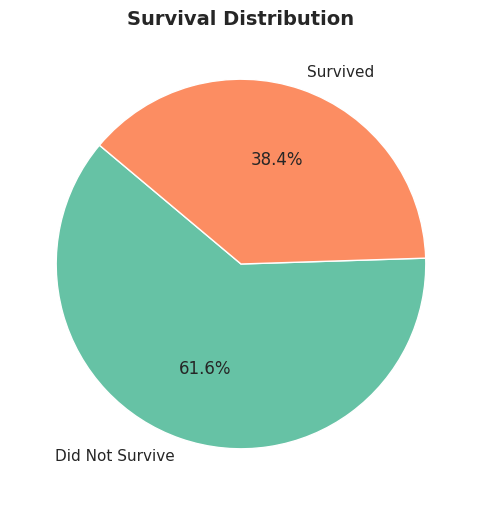

In [22]:
# Apply seaborn theme
sns.set_theme(style="whitegrid")

# Get survival counts
survival_counts = df['Survived'].value_counts()

# Define colors from seaborn color palette
colors = sns.color_palette("Set2", 2)  # 2 colors (for survived vs not)

# Create pie chart
plt.figure(figsize=(6, 6))
plt.pie(
    survival_counts,
    labels=['Did Not Survive', 'Survived'],
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    wedgeprops={'edgecolor': 'white'}
)
plt.title('Survival Distribution', fontsize=14, weight='bold')

plt.show()



In [20]:
df1= df.copy()
df1['FamilySize']= df1['SibSp'] + df1['Parch'] +1

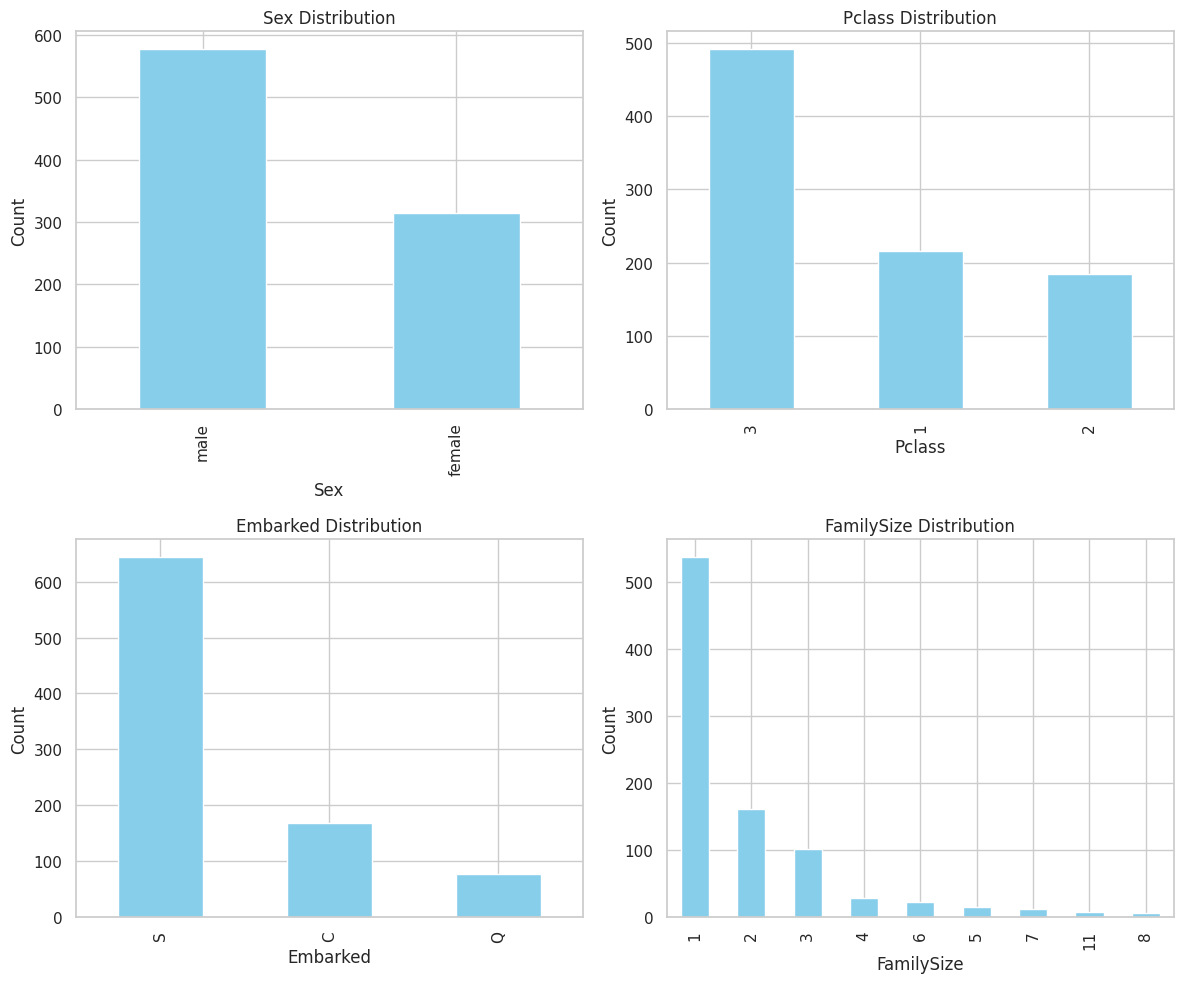

In [ ]:

# Categorical frequencies
cat_cols = ['Sex', 'Pclass', 'Embarked', 'FamilySize']
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
for i, col in enumerate(cat_cols):
    row, col_idx = i // 2, i % 2
    df1[col].value_counts().plot(kind='bar', ax=axes[row, col_idx], color='skyblue')
    axes[row, col_idx].set_title(f'{col} Distribution')
    axes[row, col_idx].set_ylabel('Count')
plt.tight_layout()
plt.show()



### Missing Values Analysis

            Column  Missing Count  Percentage
Age            Age            177       19.87
Embarked  Embarked              2        0.22


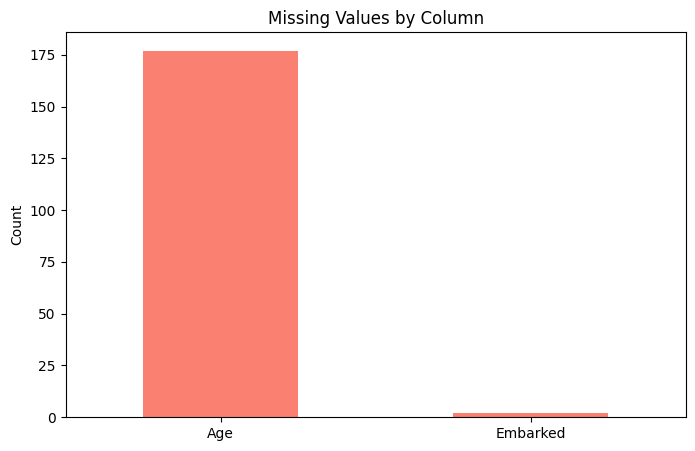

Missing Age by Pclass (%):
 Pclass
3    76.8
1    16.9
2     6.2
Name: proportion, dtype: float64


In [6]:
# Missing values
missing = df[['Age', 'Embarked']].isnull().sum()  # Cabin handled
missing_df = pd.DataFrame({'Column': missing.index, 'Missing Count': missing.values, 'Percentage': (missing / len(df) * 100).round(2)})
print(missing_df)

# Bar plot
plt.figure(figsize=(8, 5))
missing.plot(kind='bar', color='salmon')
plt.title('Missing Values by Column')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

# Missing Age by Pclass
print("Missing Age by Pclass (%):\n", df[df['Age'].isnull()]['Pclass'].value_counts(normalize=True).round(3) * 100)

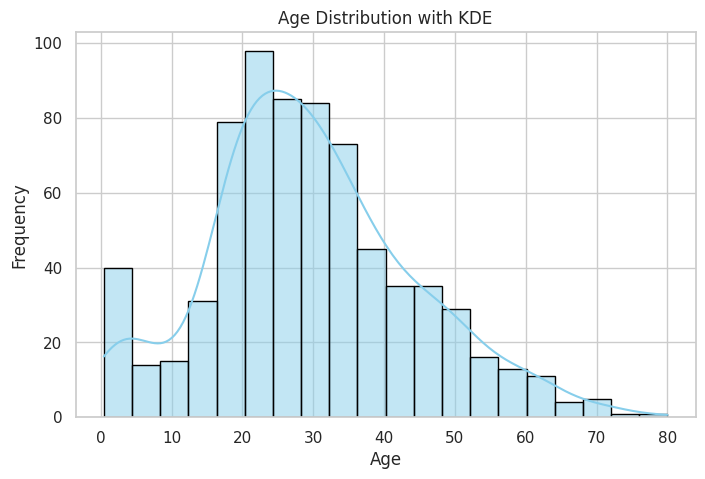

In [42]:
# Histogram for Age distribution with KDE
plt.figure(figsize=(8, 5))
sns.histplot(df['Age'], bins=20, kde=True, color='skyblue', edgecolor='black')
plt.title('Age Distribution with KDE')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

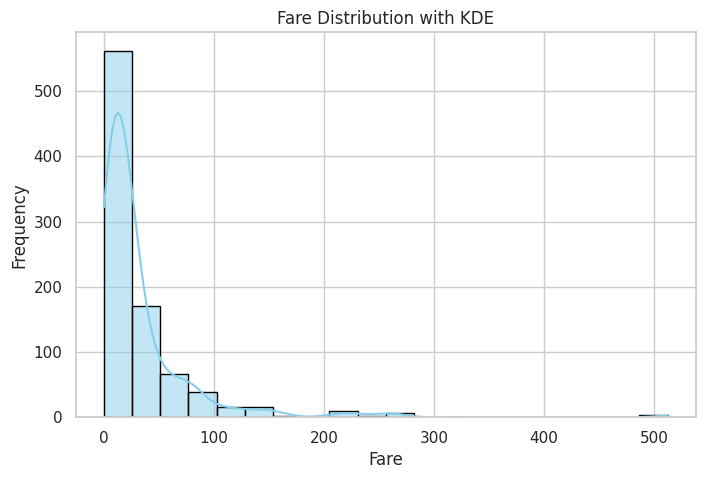

In [43]:

# Histogram for Fare distribution with KDE
plt.figure(figsize=(8, 5))
sns.histplot(df['Fare'], bins=20, kde=True, color='skyblue', edgecolor='black')
plt.title('Fare Distribution with KDE')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()


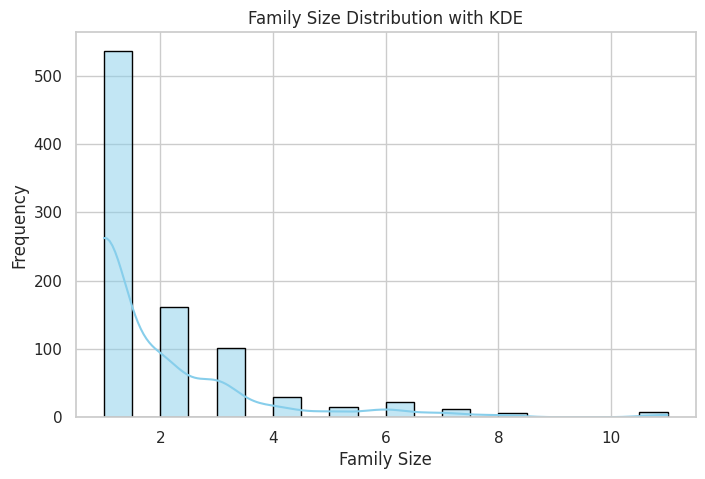

In [44]:
# Histogram for Family Size distribution with KDE
plt.figure(figsize=(8, 5))
sns.histplot(df1['FamilySize'], bins=20, kde=True, color='skyblue', edgecolor='black')
plt.title('Family Size Distribution with KDE')
plt.xlabel('Family Size')
plt.ylabel('Frequency')
plt.show()

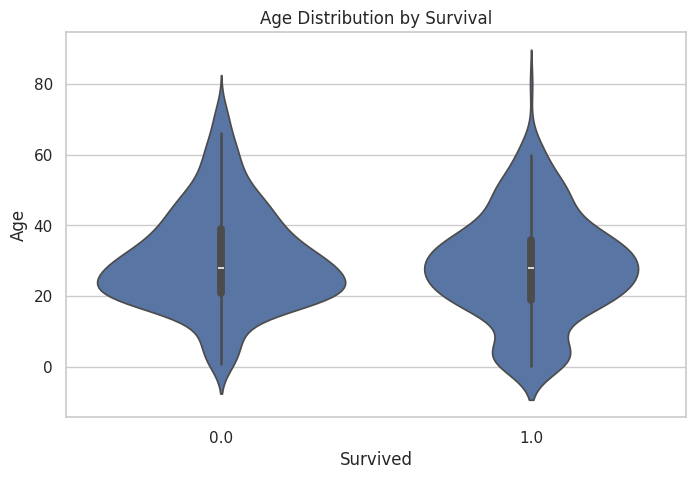

In [13]:
# Violin plot for comparing age with survival
plt.figure(figsize=(8,5))
sns.violinplot(x='Survived', y='Age', data=df)
plt.xlabel('Survived')
plt.ylabel('Age')
plt.title('Age Distribution by Survival')
plt.show()


### Bivariate Analysis - Survival vs. Demographics



Sex vs Survived (%):
 Survived     0     1
Sex                 
female    25.8  74.2
male      81.1  18.9


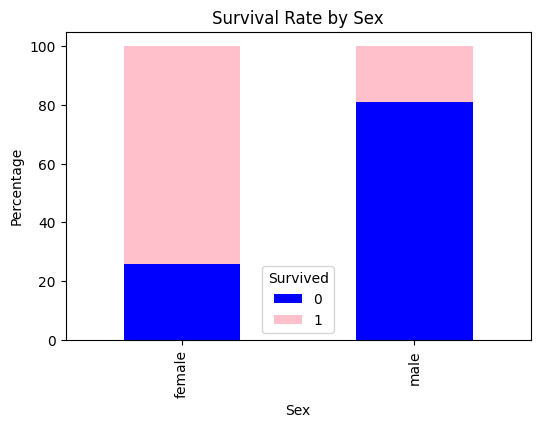


Pclass vs Survived (%):
 Survived     0     1
Pclass              
1         37.0  63.0
2         52.7  47.3
3         75.8  24.2


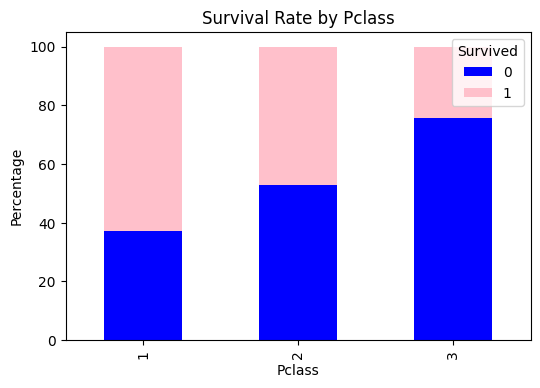


Embarked vs Survived (%):
 Survived     0     1
Embarked            
C         44.6  55.4
Q         61.0  39.0
S         66.3  33.7


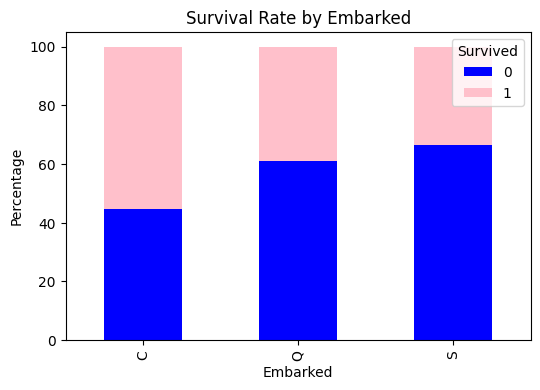


Cabin_Simple vs Survived (%):
 Survived         0     1
Cabin_Simple            
No            70.0  30.0
Yes           33.3  66.7


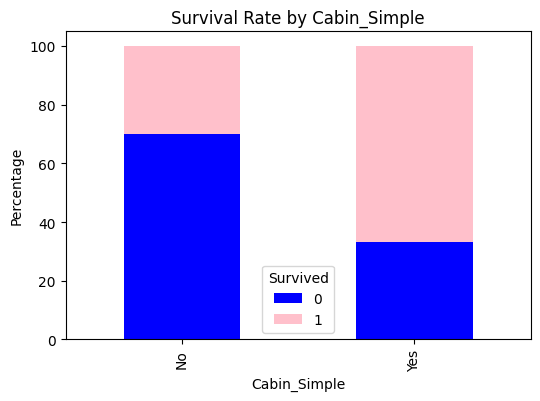

AgeGroup vs Survived (%):
 Survived        0     1
AgeGroup               
Child        49.6  50.4
Young Adult  61.7  38.3
Adult        60.0  40.0
Senior       77.3  22.7


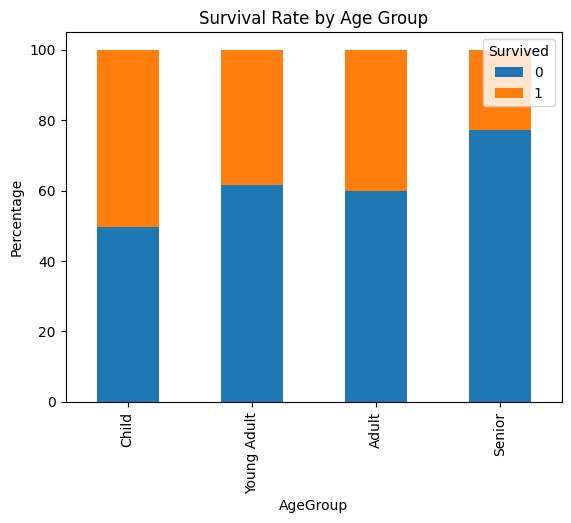

Chi-square p-value for Sex vs Survived: 1.1973570627755645e-58
Chi-square p-value for Pclass vs Survived: 4.549251711298793e-23
Chi-square p-value for Cabin_Simple vs Survived: 6.7419704360811776e-21


In [ ]:
# Survival rates
for col in ['Sex', 'Pclass', 'Embarked', 'Cabin_Simple']:
    crosstab = pd.crosstab(df[col], df['Survived'], normalize='index').round(3) * 100
    print(f"\n{col} vs Survived (%):\n", crosstab)
    crosstab.plot(kind='bar', stacked=True, figsize=(6, 4), color=['blue', 'pink'])
    plt.title(f'Survival Rate by {col}')
    plt.ylabel('Percentage')
    plt.legend(title='Survived')
    plt.show()

# Age groups
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 18, 35, 60, 100], labels=['Child', 'Young Adult', 'Adult', 'Senior'])
age_crosstab = pd.crosstab(df['AgeGroup'], df['Survived'], normalize='index').round(3) * 100
print("AgeGroup vs Survived (%):\n", age_crosstab)
age_crosstab.plot(kind='bar', stacked=True)
plt.title('Survival Rate by Age Group')
plt.ylabel('Percentage')
plt.show()



### Bivariate Analysis - Cabin vs. Pclass & Survival

Cabin vs Pclass (%):
 Pclass           1     2     3
Cabin_Simple                  
No             5.8  24.5  69.7
Yes           86.3   7.8   5.9


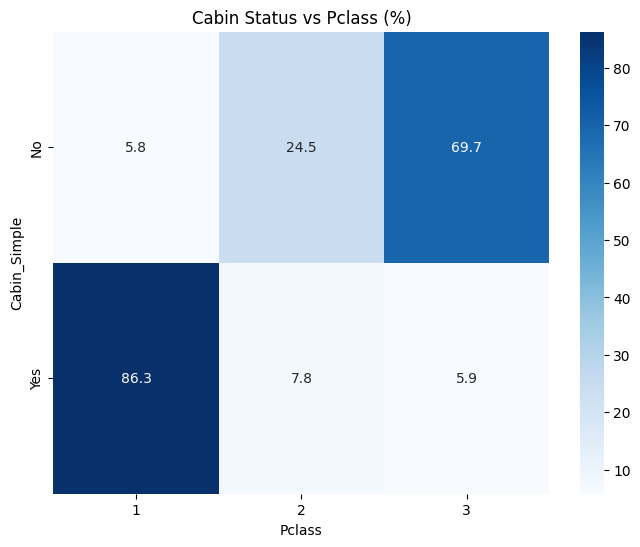

Cabin-Pclass vs Survived (%):
 Survived                0     1
Cabin_Simple Pclass            
No           1       52.5  47.5
             2       56.0  44.0
             3       76.4  23.6
Yes          1       33.5  66.5
             2       18.8  81.2
             3       50.0  50.0


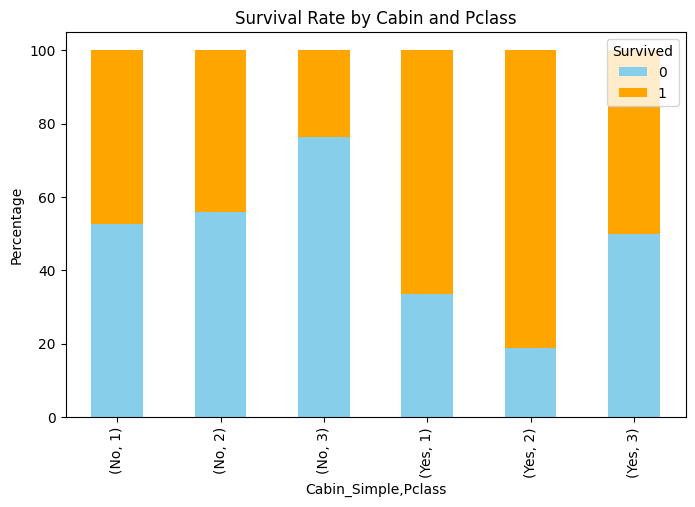

In [16]:
# Cabin vs Pclass
cabin_pclass = pd.crosstab(df['Cabin_Simple'], df['Pclass'], normalize='index').round(3) * 100
print("Cabin vs Pclass (%):\n", cabin_pclass)
plt.figure(figsize=(8, 6))
sns.heatmap(cabin_pclass, annot=True, cmap='Blues', fmt='.1f')
plt.title('Cabin Status vs Pclass (%)')
plt.show()

# Survival by Cabin and Pclass
cabin_pclass_survival = pd.crosstab([df['Cabin_Simple'], df['Pclass']], df['Survived'], normalize='index').round(3) * 100
print("Cabin-Pclass vs Survived (%):\n", cabin_pclass_survival)
cabin_pclass_survival.plot(kind='bar', stacked=True, figsize=(8, 5), color=['skyblue', 'orange'])
plt.title('Survival Rate by Cabin and Pclass')
plt.ylabel('Percentage')
plt.show()

### Bivariate Analysis - Economic & Family Factors

FamilySize vs Survived (%):
 Survived        0     1
FamilySize             
1            69.6  30.4
2            44.7  55.3
3            42.2  57.8
4            27.6  72.4
5            80.0  20.0
6            86.4  13.6
7            66.7  33.3
8           100.0   0.0
11          100.0   0.0


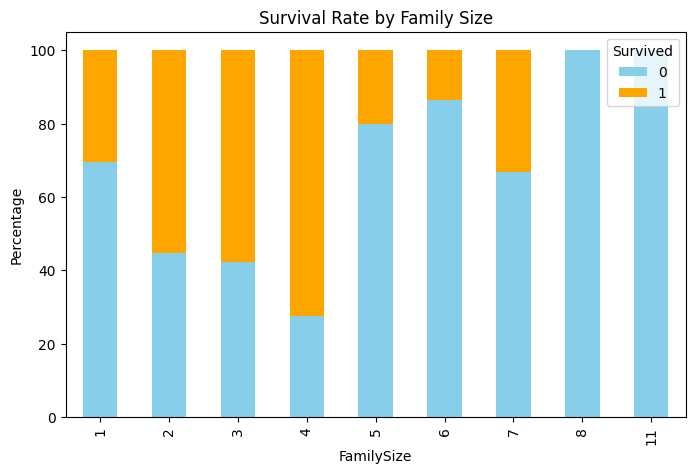

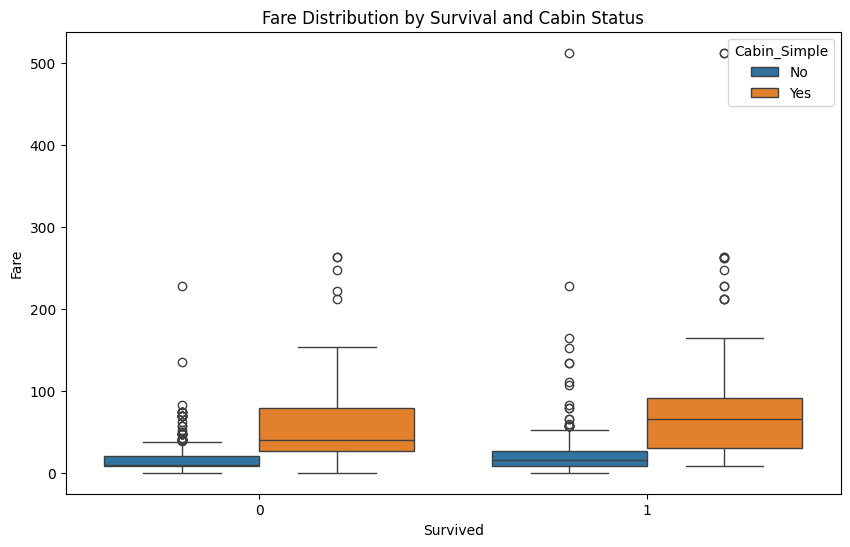

Correlation Fare-Survived: 0.2573065223849625
Median Fare by Cabin:
 Cabin_Simple
No     10.50000
Yes    55.22085
Name: Fare, dtype: float64


In [18]:
# Family size
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
family_crosstab = pd.crosstab(df['FamilySize'], df['Survived'], normalize='index').round(3) * 100
print("FamilySize vs Survived (%):\n", family_crosstab)
family_crosstab.plot(kind='bar', stacked=True, figsize=(8, 5), color=['skyblue', 'orange'])
plt.title('Survival Rate by Family Size')
plt.ylabel('Percentage')
plt.show()

# Fare by Survived and Cabin
plt.figure(figsize=(10, 6))
sns.boxplot(x='Survived', y='Fare', hue='Cabin_Simple', data=df)
plt.title('Fare Distribution by Survival and Cabin Status')
plt.show()

# Correlation
print("Correlation Fare-Survived:", df['Fare'].corr(df['Survived']))
print("Median Fare by Cabin:\n", df.groupby('Cabin_Simple')['Fare'].median())

### Multivariate Analysis & Correlations

Correlation Matrix:
           Pclass   Age  SibSp  Parch  Fare  Survived
Pclass      1.00 -0.37   0.08   0.02 -0.55     -0.34
Age        -0.37  1.00  -0.31  -0.19  0.10     -0.08
SibSp       0.08 -0.31   1.00   0.41  0.16     -0.04
Parch       0.02 -0.19   0.41   1.00  0.22      0.08
Fare       -0.55  0.10   0.16   0.22  1.00      0.26
Survived   -0.34 -0.08  -0.04   0.08  0.26      1.00


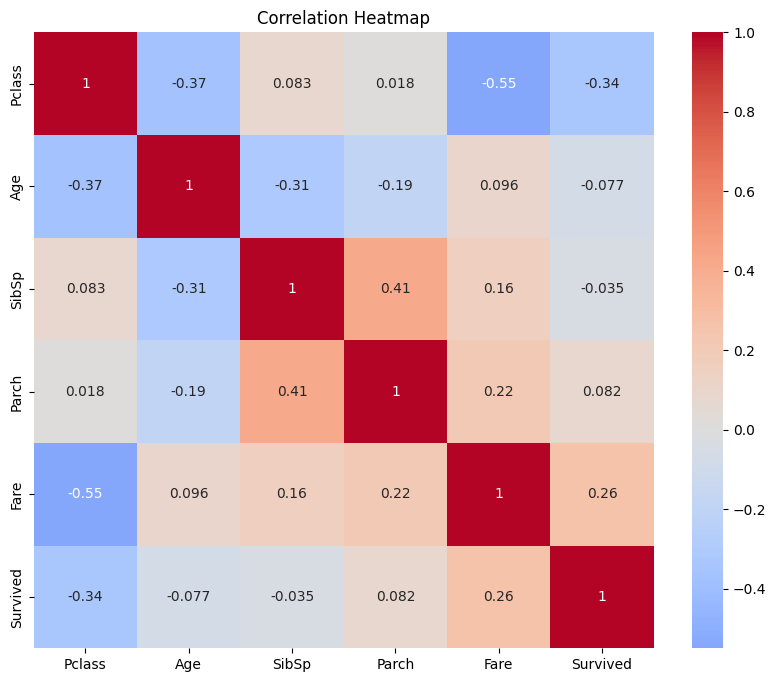

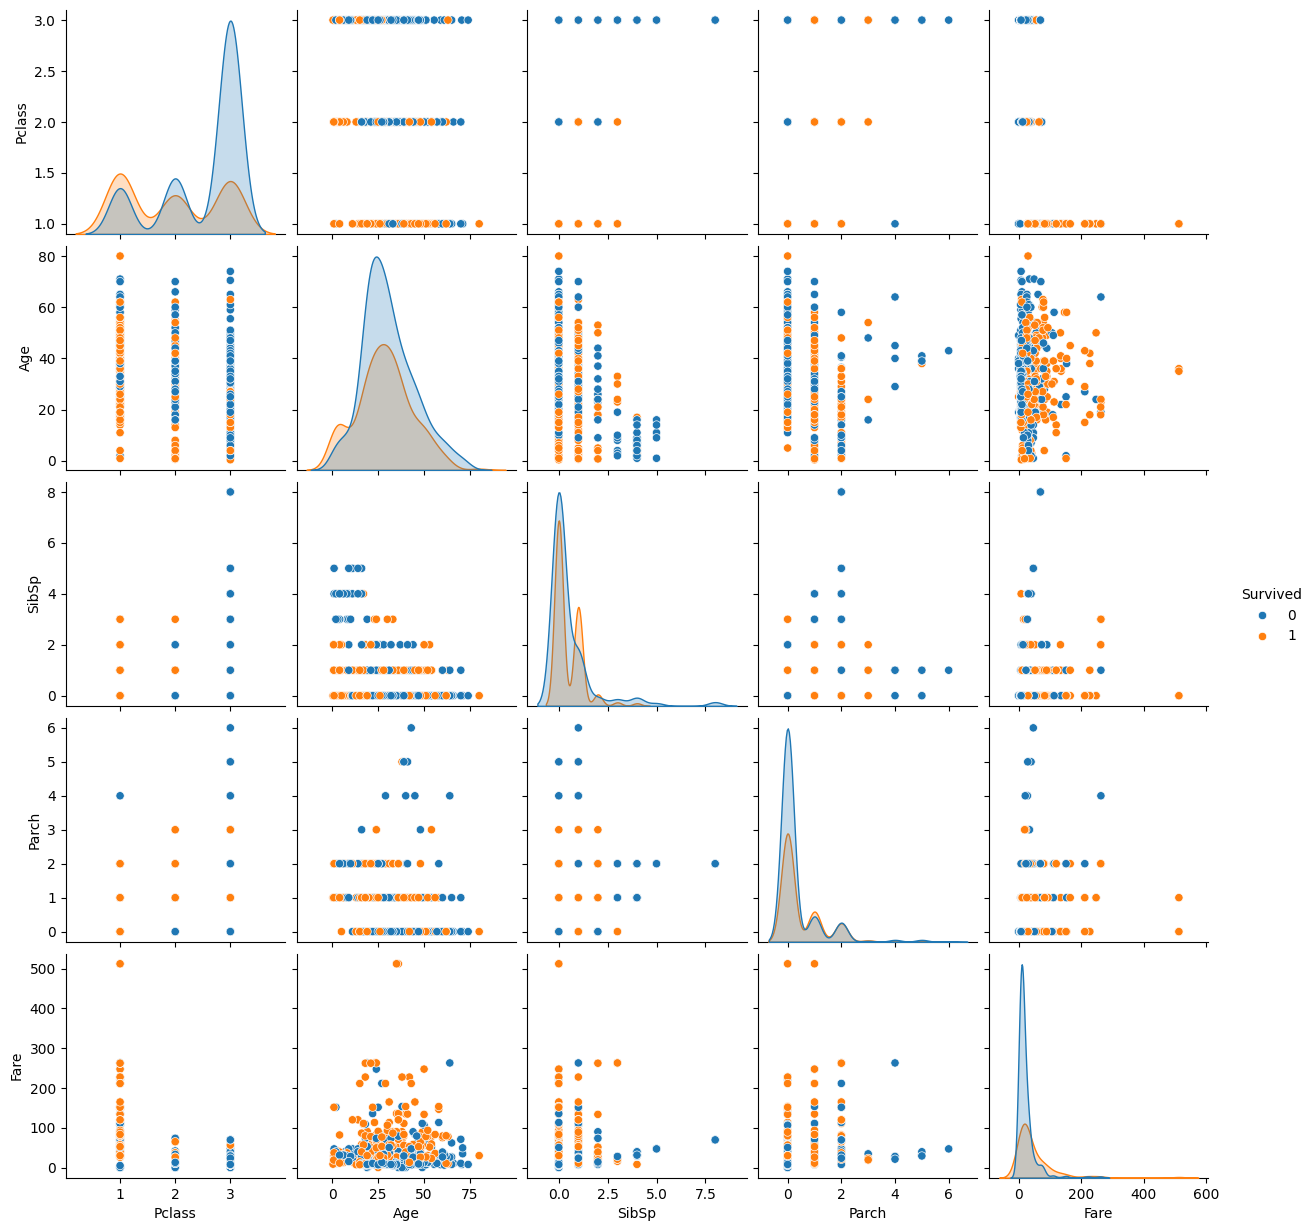

Cabin-Pclass-Sex vs Survived (%):
 Survived                       0      1
Cabin_Simple Pclass Sex                
No           1      female   0.0  100.0
                    male    77.8   22.2
             2      female   7.6   92.4
                    male    87.3   12.7
             3      female  50.7   49.3
                    male    86.8   13.2
Yes          1      female   3.7   96.3
                    male    58.9   41.1
             2      female  10.0   90.0
                    male    33.3   66.7
             3      female  33.3   66.7
                    male    66.7   33.3


In [ ]:
numerical = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Survived']
corr_matrix = df[numerical].corr()
print("Correlation Matrix:\n", corr_matrix.round(2))

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

# Pairplot
sns.pairplot(df[numerical], hue='Survived')
plt.show()

# Multivariate crosstab
multi_crosstab = pd.crosstab([df['Cabin_Simple'], df['Pclass'], df['Sex']], df['Survived'], normalize='index').round(3) * 100
print("Cabin-Pclass-Sex vs Survived (%):\n", multi_crosstab)

Age Outliers (IQR): 11
Fare Outliers (IQR): 116
Fare Outliers in Has_Cabin (%):
 Cabin_Simple
Yes    77.586207
No     22.413793
Name: proportion, dtype: float64


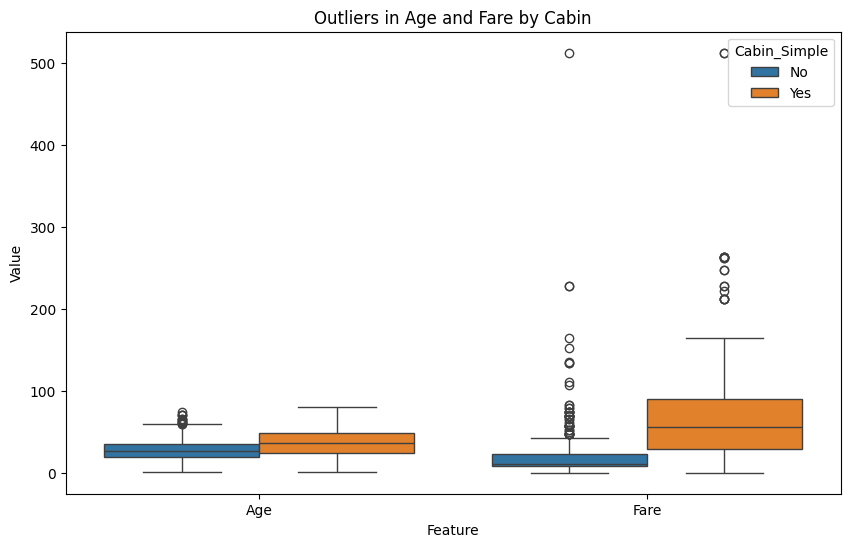

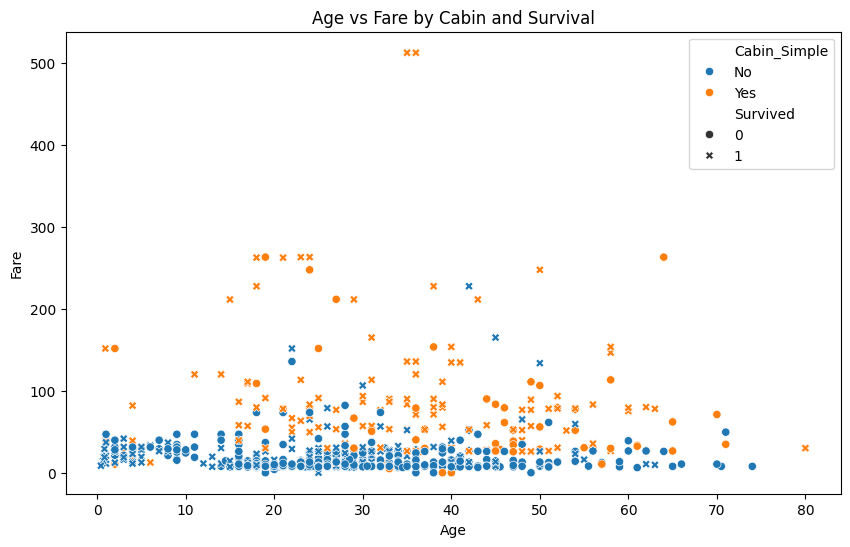

In [ ]:
# Outlier detection function
def detect_outliers_iqr(col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[col] < Q1 - 1.5*IQR) | (df[col] > Q3 + 1.5*IQR)]
    return len(outliers)

# IQR outliers 
for col in ['Age', 'Fare']:
    print(f"{col} Outliers (IQR):", detect_outliers_iqr(col))

# Fare outliers by Cabin
fare_outliers = df[df['Fare'] > df['Fare'].quantile(0.75) + 1.5 * (df['Fare'].quantile(0.75) - df['Fare'].quantile(0.25))]
print("Fare Outliers in Has_Cabin (%):\n", fare_outliers['Cabin_Simple'].value_counts(normalize=True) * 100)

# Boxplot
df_melted = df.melt(
    id_vars=['Cabin_Simple'], 
    value_vars=['Age', 'Fare'], 
    var_name='Feature', 
    value_name='Value'
)

plt.figure(figsize=(10, 6))
sns.boxplot(x='Feature', y='Value', hue='Cabin_Simple', data=df_melted)
plt.title('Outliers in Age and Fare by Cabin')
plt.show()

# Scatterplot 
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Fare', hue='Cabin_Simple', style='Survived', data=df)
plt.title('Age vs Fare by Cabin and Survival')
plt.show()

## Preprocessing & Cleaning

### Missing Values Imputation

In [ ]:
# Dropping Cabin Since it more than 50% missing values
df = df.drop(columns= ['Cabin'])

# Simple Imputation
df_simple = df.copy()
df_simple['Age']= df_simple['Age'].fillna(df_simple['Age'].mean())  # Mean for Age
df_simple['Embarked']=df_simple['Embarked'].fillna(df_simple['Embarked'].mode()[0])  # Mode for Embarked
print("Missing after simple imputation:\n", df_simple.isnull().sum())

# Advanced: KNN Imputation for Age (requires numerical features)
df_knn = df.copy()
numerical_cols = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']  # Features for KNN
knn_imputer = KNNImputer(n_neighbors=5)
df_knn[numerical_cols] = knn_imputer.fit_transform(df_knn[numerical_cols])

# Mode for Embarked, drop Cabin
df_knn['Embarked']= df_knn['Embarked'].fillna(df_knn['Embarked'].mode()[0])
print("Missing after KNN imputation:\n", df_knn.isnull().sum())


Missing after simple imputation:
 PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64
Missing after KNN imputation:
 PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [5]:
# Transformer for Missing Values
class Titatnic_Imputer(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.knn_imputer = KNNImputer(n_neighbors=5)
        self.mode_embarked = None
    
    def fit(self, X, y=None):
        # Store mode of Embarked
        self.mode_embarked = X['Embarked'].mode()[0]
        # Fit KNN imputer on numerical columns
        numerical_cols = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
        self.knn_imputer.fit(X[numerical_cols])
        return self
    
    def transform(self, X):
        X_copy = X.copy()
        # KNN imputation for Age
        numerical_cols = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
        X_copy[numerical_cols] = self.knn_imputer.transform(X_copy[numerical_cols])
        # Mode imputation for Embarked
        X_copy['Embarked'].fillna(self.mode_embarked, inplace=True)
        # Drop Cabin
        X_copy.drop('Cabin', axis=1, inplace=True)
        return X_copy

In [6]:
# Transformer for Encoding
class FeatureEncoder(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.label_encoder = LabelEncoder()
        self.onehot_encoder = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')
    
    def fit(self, X, y=None):
        # Fit LabelEncoder for Sex
        self.label_encoder.fit(X['Sex'])
        # Fit OneHotEncoder for Embarked
        self.onehot_encoder.fit(X[['Embarked']])
        return self
    
    def transform(self, X):
        X_copy = X.copy()
        # Label encode Sex
        X_copy['Sex'] = self.label_encoder.transform(X_copy['Sex'])
        # One-hot encode Embarked
        encoded_embarked = self.onehot_encoder.transform(X_copy[['Embarked']])
        embarked_columns = self.onehot_encoder.get_feature_names_out(['Embarked'])
        X_copy[embarked_columns] = encoded_embarked
        # Drop original Embarked
        X_copy.drop('Embarked', axis=1, inplace=True)
        return X_copy

In [7]:
# Transformer for Scaling
class FeatureScaler(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.scaler = StandardScaler()
    
    def fit(self, X, y=None):
        numerical_cols = ['Age']
        self.scaler.fit(X[numerical_cols])
        return self
    
    def transform(self, X):
        X_copy = X.copy()
        numerical_cols = ['Age']
        X_copy[numerical_cols] = self.scaler.transform(X_copy[numerical_cols])
        return X_copy

In [8]:
# Create the pipeline
pipeline = Pipeline([
    ('age_imputer', Titatnic_Imputer()),
    ('feature_encoder', FeatureEncoder()),
    ('feature_scaler', FeatureScaler())
])

# Fit and transform the dataset
df_transformed = pipeline.fit_transform(df)
df_transformed_test= pipeline.transform(test_df)

/tmp/ipykernel_116192/3055016481.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_copy['Embarked'].fillna(self.mode_embarked, inplace=True)
/tmp/ipykernel_116192/3055016481.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inp

In [10]:
# Save the cleaned dataset
df_transformed.to_csv('cleaned_titanic_post_pipeline.csv', index=False)
print("Cleaned dataset saved as 'cleaned_titanic_pipeline.csv'")



df_transformed.head()

Cleaned dataset saved as 'cleaned_titanic_pipeline.csv'


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_Q,Embarked_S
0,1,0,3.0,"Braund, Mr. Owen Harris",1,-0.587650,1.0,0.0,A/5 21171,7.2500,0.0,1.0
1,2,1,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,0.608007,1.0,0.0,PC 17599,71.2833,0.0,0.0
2,3,1,3.0,"Heikkinen, Miss. Laina",0,-0.288735,0.0,0.0,STON/O2. 3101282,7.9250,0.0,1.0
3,4,1,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,0.383821,1.0,0.0,113803,53.1000,0.0,1.0
4,5,0,3.0,"Allen, Mr. William Henry",1,0.383821,0.0,0.0,373450,8.0500,0.0,1.0


In [9]:
df_transformed_test.to_csv('cleaned_titanic_test_post_pipeline.csv', index=False)
